In [27]:
import requests
from datetime import datetime
import json
import pandas as pd

# Test the different endpoint from the API

In [28]:
backendUrl="https://exj7xp8iog.execute-api.eu-west-3.amazonaws.com/laurent"


### Create a consumption record

In [30]:
from random import randrange
def get_consumption(device,ts):
    return {
        "consumptionDate":ts,
        "consumption": [randrange(10,3000) for _ in range(5)],
        "deviceNumber": device,
        "details": [randrange(100,300) for _ in range(5)]
        }

ts=datetime.now().isoformat()
for device in range(0,5):
    data=json.dumps(get_consumption(device,ts))
    url=f"{backendUrl}/create/consumption"
    rq=requests.post(url,data)
    print(device,rq.status_code)

0 200
1 200
2 200
3 200
4 200


In [7]:
data

'{"consumptionDate": "2023-01-07T16:10:57.619879", "consumption": [2180, 178, 63, 1129, 1035], "deviceNumber": 1, "details": [256, 267, 205, 241, 244]}'

In [29]:
rq=requests.post("http://localhost:8000/create/Consumption","[]")
rq

ConnectionError: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /create/Consumption (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x13ed69df0>: Failed to establish a new connection: [Errno 61] Connection refused'))

### Get the consumption data from backend

In [43]:
startDate="2023-01-09T23"
url=f"{backendUrl}/getAll/consumption?startDate={startDate}"
message=requests.get(url).json()
len(message["data"]),max([d["consumptionDate"] for d in message["data"]])

(30, '2023-01-09T23:41:15.245604+01:00 ')

In [40]:
sorted([(d["consumptionDate"],d["deviceNumber"]) for d in message["data"]])

[('2023-01-09T23:19:52.214789+01:00 ', 0),
 ('2023-01-09T23:19:52.214789+01:00 ', 1),
 ('2023-01-09T23:19:52.214789+01:00 ', 2),
 ('2023-01-09T23:19:52.214789+01:00 ', 3),
 ('2023-01-09T23:19:52.214789+01:00 ', 4),
 ('2023-01-09T23:20:55.884766+01:00 ', 0),
 ('2023-01-09T23:20:55.884766+01:00 ', 1),
 ('2023-01-09T23:20:55.884766+01:00 ', 2),
 ('2023-01-09T23:20:55.884766+01:00 ', 3),
 ('2023-01-09T23:20:55.884766+01:00 ', 4),
 ('2023-01-09T23:26:10.893127+01:00 ', 0),
 ('2023-01-09T23:26:10.893127+01:00 ', 1),
 ('2023-01-09T23:26:10.893127+01:00 ', 2),
 ('2023-01-09T23:26:10.893127+01:00 ', 3),
 ('2023-01-09T23:26:10.893127+01:00 ', 4),
 ('2023-01-09T23:39:05.603868+01:00 ', 0),
 ('2023-01-09T23:39:05.603868+01:00 ', 1),
 ('2023-01-09T23:39:05.603868+01:00 ', 2),
 ('2023-01-09T23:39:05.603868+01:00 ', 3),
 ('2023-01-09T23:39:05.603868+01:00 ', 4),
 ('2023-01-09T23:40:10.810182+01:00 ', 0),
 ('2023-01-09T23:40:10.810182+01:00 ', 1),
 ('2023-01-09T23:40:10.810182+01:00 ', 2),
 ('2023-01-

In [41]:
data=pd.DataFrame(message["data"])
data.loc[:,"kwh"]=[ sum(c) for c in data.consumption]

data.sort_values("consumptionDate").tail()

,consumptionDate,deviceType,deviceNumber,updatedAt,createdAt,consumption,SK,details,PK,id,kwh
10,2023-01-09T23:40:10.810182+01:00,oven,1,2023-01-09T22:40:13.861Z,2023-01-09T22:40:13.861Z,"[0, 0, 39.65829, 0, 0]",CONSUMPTION#oven,"[0, 0, 64, 0, 0]",CONSUMPTION#ef9f30f7-cdf2-4648-93ee-d73fe5e0de3e,ef9f30f7-cdf2-4648-93ee-d73fe5e0de3e,39.65829
8,2023-01-09T23:40:10.810182+01:00,unknown,4,2023-01-09T22:40:13.861Z,2023-01-09T22:40:13.861Z,"[0, 17.56027, 18.50404, 0, 0]",CONSUMPTION#unknown,"[0, 32, 32, 0, 0]",CONSUMPTION#2d796cb6-182e-4935-9152-c7084cae0c17,2d796cb6-182e-4935-9152-c7084cae0c17,36.06431
2,2023-01-09T23:40:10.810182+01:00,unknown,0,2023-01-09T22:40:13.861Z,2023-01-09T22:40:13.861Z,"[0, 0, 34.2224, 19.10643, 0]",CONSUMPTION#unknown,"[0, 0, 41, 22, 0]",CONSUMPTION#b6b6f10d-8a12-4146-8c4c-85aeffdba9ef,b6b6f10d-8a12-4146-8c4c-85aeffdba9ef,53.32883
23,2023-01-09T23:40:10.810182+01:00,unknown,3,2023-01-09T22:40:13.861Z,2023-01-09T22:40:13.861Z,"[0, 34.01936, 0, 0, 0]",CONSUMPTION#unknown,"[0, 64, 0, 0, 0]",CONSUMPTION#77195d19-8fd7-460b-9a8e-d6a2ad1c2de4,77195d19-8fd7-460b-9a8e-d6a2ad1c2de4,34.01936
24,2023-01-09T23:40:10.810182+01:00,washingMachine,2,2023-01-09T22:40:13.861Z,2023-01-09T22:40:13.861Z,"[0, 0, 38.4864, 0, 0]",CONSUMPTION#washingMachine,"[0, 0, 64, 0, 0]",CONSUMPTION#3d8954ae-e308-4102-a934-0c6f7112b60a,3d8954ae-e308-4102-a934-0c6f7112b60a,38.48640


<AxesSubplot:xlabel='consumptionDate'>

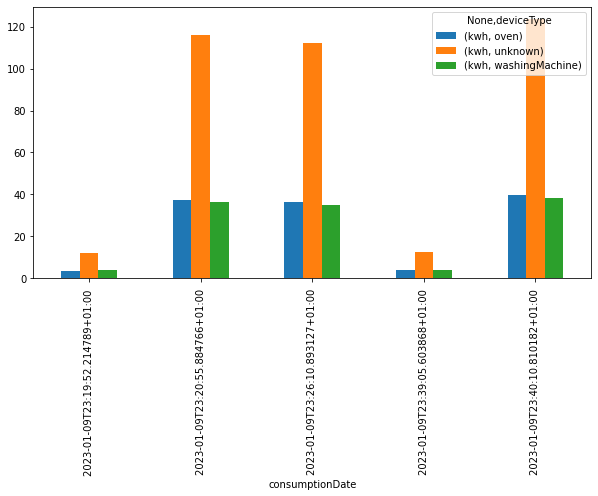

In [42]:
data.groupby(["consumptionDate","deviceType"]).agg(kwh=("kwh","sum")).unstack().fillna(0).plot.bar(figsize=(10,5))

In [10]:
data.groupby(["consumptionDate","deviceNumber"]).agg(kwh=("kwh","sum"),ct=("deviceNumber","nunique")).unstack().fillna(0)

kwh                                  \
deviceNumber                              0            1         2        3   
consumptionDate                                                               
2023-01-07T16:08:15.332631+01:00   0.000000     1.560122  0.000000  0.00000   
2023-01-07T16:10:57.619879         0.000000  4585.000000  0.000000  0.00000   
2023-03-01T16:58:11.117293+01:00   1.560122     1.663221  1.802807  1.97167   

                                              ct                      
deviceNumber                              4    0    1    2    3    4  
consumptionDate                                                       
2023-01-07T16:08:15.332631+01:00   0.000000  0.0  1.0  0.0  0.0  0.0  
2023-01-07T16:10:57.619879         0.000000  0.0  1.0  0.0  0.0  0.0  
2023-03-01T16:58:11.117293+01:00   3.269307  1.0  1.0  1.0  1.0  1.0

In [117]:
data.tail()

,consumptionDate,deviceType,deviceNumber,updatedAt,createdAt,consumption,SK,details,PK,id,kwh
15,2023-01-01T16:58:11.117293+01:00,oven,1,2023-01-01T15:59:15.812Z,2023-01-01T15:59:15.812Z,"[1199, 702, 546, 2355, 68]",CONSUMPTION#oven,"[217, 279, 290, 232, 236]",CONSUMPTION#619df004-b13f-495b-b6fb-ab5e3ffa46d9,619df004-b13f-495b-b6fb-ab5e3ffa46d9,4870.000000
16,2023-01-01T16:42:30.245982+01:00\r,unknown,0,2023-01-01T15:42:31.127Z,2023-01-01T15:42:31.127Z,"[0, 7.36017, 1.497986, 0.159197, 0]",CONSUMPTION#unknown,"[0, 13, 2, 0, 0]",CONSUMPTION#fc1420b5-0568-47a8-b8ad-42824c20a920,fc1420b5-0568-47a8-b8ad-42824c20a920,9.017353
17,2023-01-01T17:36:27.042580+01:00\r,unknown,0,2023-01-01T16:36:28.282Z,2023-01-01T16:36:28.282Z,"[0, 0, 3.220851, 0.152015, 0]",CONSUMPTION#unknown,"[0, 0, 5, 0, 0]",CONSUMPTION#70796b4f-a5d6-451f-8843-88266ff6702a,70796b4f-a5d6-451f-8843-88266ff6702a,3.372866
18,2023-01-01T16:58:11.117293+01:00,unknown,4,2023-01-01T16:48:36.968Z,2023-01-01T16:48:36.968Z,"[1.194518, 2.074789, 0, 0, 0]",CONSUMPTION#unknown,"[7, 5, 0, 0, 0]",CONSUMPTION#81c6f1cf-baf2-41c9-876d-08667960a055,81c6f1cf-baf2-41c9-876d-08667960a055,3.269307
19,2023-01-01T17:36:27.042580+01:00\r,unknown,4,2023-01-01T16:36:28.777Z,2023-01-01T16:36:28.777Z,"[0.376513, 1.428964, 0, 0, 0]",CONSUMPTION#unknown,"[1, 4, 0, 0, 0]",CONSUMPTION#64924d10-e899-4723-b690-e9b51a3fb9f4,64924d10-e899-4723-b690-e9b51a3fb9f4,1.805477


In [2]:
import serial
from serial.tools import list_ports

In [41]:
data=[
{"consumptionDate":"2023-03-01T16:58:11.117293+01:00 ","deviceNumber":0,"consumption":[0.984873,0.363306,0,0,0.211943],"details":[11,0,0,0,0]},
{"consumptionDate":"2023-03-01T16:58:11.117293+01:00 ","deviceNumber":1,"consumption":[0.850754,0.457867,0,0.3546,0],"details":[11,0,0,0,0]},
{"consumptionDate":"2023-03-01T16:58:11.117293+01:00 ","deviceNumber":2,"consumption":[0.817416,0.45091,0,0.534481,0],"details":[11,0,0,0,0]},
{"consumptionDate":"2023-03-01T16:58:11.117293+01:00 ","deviceNumber":3,"consumption":[0.79601,0.462096,0,0.713564,0],"details":[11,0,0,0,0]},
{"consumptionDate":"2023-03-01T16:58:11.117293+01:00 ","deviceNumber":4,"consumption":[1.194518,2.074789,0,0,0],"details":[7,5,0,0,0]}
]
[len(json.dumps(d)) for d in data]

[157, 155, 156, 156, 149]

In [5]:
for l in data:
    url=f"{backendUrl}/create/consumption"
    rq=requests.post(url,json.dumps(l))
    print(rq.status_code)


200
200
200
200
200


In [42]:
len("2023-03-01T16:58:11.117293+01:00")

32

In [3]:
for p in list_ports.grep(".*serial.*"):
    print(p)

/dev/cu.usbserial-110 - USB2.0-Ser!


In [18]:
from datetime import datetime
import serial
with serial.Serial('/dev/cu.usbserial-110', baudrate=115200, timeout=5) as ser:
    print(ser.name)
    ser.write((datetime.now().isoformat()+"\x0D").encode("utf-8"))
    print("out:",ser.out_waiting)
    ser.flush()
    while ser.in_waiting==0:
        pass
    while True:
        print("in:",ser.in_waiting)
        chr=ser.read()
        if chr==b"\x1A":
            break;
        print(chr)

/dev/cu.usbserial-110
out: 0


KeyboardInterrupt: 

In [15]:
print((datetime.now().isoformat()+"\x0A").encode("utf-8"))

b'2023-01-09T20:52:11.754715\n'


In [ ]:
help(serial.Serial)

Help on class Serial in module serial.serialposix:

class Serial(serial.serialutil.SerialBase, PlatformSpecific)
 |  Serial(port=None, baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, write_timeout=None, dsrdtr=False, inter_byte_timeout=None, exclusive=None, **kwargs)
 |  
 |  Serial port class POSIX implementation. Serial port configuration is
 |  done with termios and fcntl. Runs on Linux and many other Un*x like
 |  systems.
 |  
 |  Method resolution order:
 |      Serial
 |      serial.serialutil.SerialBase
 |      io.RawIOBase
 |      _io._RawIOBase
 |      io.IOBase
 |      _io._IOBase
 |      PlatformSpecific
 |      PlatformSpecificBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  cancel_read(self)
 |  
 |  cancel_write(self)
 |  
 |  close(self)
 |      Close port
 |  
 |  fileno(self)
 |      For easier use of the serial port instance with select.
 |      WARNING: this function is not portable to different platf

In [24]:
msg="""{"level":50,"time":1673295884626,"pid":8,"hostname":"169.254.143.245","msg":"[{\\"consumptionDate\\":\\"2023-01-09T21:24:42.268975+01:00 \\",\\"deviceNumber\\":0,\\"consumption\\":[0,0,0,4.453824,0.205064],\\"details\\":[0,0,0,5,0]}e\":\"2023-01-09T21:24:42.268975+01:00 \",\"deviceNumber\":1,\"consumption\":[0,0,2.704565,0.742902,0.379641],\"details\":[0,0,4,0,0]},{\"consumptionDate\":\"2023-01-09T21:24:42.268975+01:00 \",\"deviceNumber\":2,\"consumption\":[0,0,2.619451,0.749792,0.562333],\"details\":[0,0,4,0,0]}e\":\"2023-01-09T21:24:42.268975+01:00 \",\"deviceNumber\":3,\"consumption\":[0,1.838362,0.475418,1.444977,0],\"details\":[0,3,0,1,0]},{\"consumptionDate\":\"2023-01-09T21:24:42.268975+01:00 \",\"deviceNumber\\":4,\\"consumption\\":[0,0,3.163393,0.856815,0],\\"details\\":[0,0,5,0,0]}]"}"""

In [25]:
import json
json.loads(msg)

JSONDecodeError: Expecting ',' delimiter: line 1 column 98 (char 97)

In [22]:
msg[79:]

'"consumptionDate":"2023-01-09T21:24:42.268975+01:00 ","deviceNumber":0,"consumption":[0,0,0,4.453824,0.205064],"details":[0,0,0,5,0]}e":"2023-01-09T21:24:42.268975+01:00 ","deviceNumber":1,"consumption":[0,0,2.704565,0.742902,0.379641],"details":[0,0,4,0,0]},{"consumptionDate":"2023-01-09T21:24:42.268975+01:00 ","deviceNumber":2,"consumption":[0,0,2.619451,0.749792,0.562333],"details":[0,0,4,0,0]}e":"2023-01-09T21:24:42.268975+01:00 ","deviceNumber":3,"consumption":[0,1.838362,0.475418,1.444977,0],"details":[0,3,0,1,0]},{"consumptionDate":"2023-01-09T21:24:42.268975+01:00 ","deviceNumber":4,"consumption":[0,0,3.163393,0.856815,0],"details":[0,0,5,0,0]}]"}'